In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../datasets/network_anomaly_dataset.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
# columns or attributes in the data
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [5]:
# shape of the data
df.shape

(125973, 43)

In [6]:
# data types of each column in the data and structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [7]:
# statistical summary of numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
srcbytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dstbytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrongfragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
numfailedlogins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
loggedin,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
numcompromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [8]:
# creating a new column "attackhlc" that represents a high level classification of the "attack" attribute
df["attack"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [9]:
attackhlc = {
    "normal": "normal",
    "neptune": "dos",
    "warezclient": "r2l",
    "ipsweep": "probe",
    "portsweep": "probe",
    "teardrop": "dos",
    "nmap": "probe",
    "satan": "probe",
    "smurf": "dos",
    "pod": "dos",
    "back": "dos",
    "guess_passwd": "r2l",
    "ftp_write": "r2l",
    "multihop": "r2l",
    "rootkit": "u2r",
    "buffer_overflow": "u2r",
    "imap": "r2l",
    "warezmaster": "r2l",
    "phf": "r2l",
    "land": "dos",
    "loadmodule": "u2r",
    "spy": "r2l",
    "perl": "u2r"
}

df["attackhlc"] = df["attack"].apply(lambda x: attackhlc[x[:]])
df.shape

(125973, 44)

In [10]:
df["attackhlc"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [11]:
# the "attackhlc" column will be the target variable for the model
# dropping the "attack" column
df.drop(columns = ["attack"], inplace = True)
df.shape

(125973, 43)

In [12]:
# dropping the redundant and undefined columns
# the only unique value in the "numoutboundcmds" column is 0, hence "numoutboundcmds" is dropped from the DataFrame
# there is no description available of the "lastflag" column in the column profiling, hence "lastflag" is dropped from the DataFrame
df.drop(columns = ["numoutboundcmds", "lastflag"], inplace = True)
df.shape

(125973, 41)

In [13]:
# unique elements in each column
for i in df.columns:
    print("--------------------")
    print(f"Column Name: {i}")
    print(f"Number of unique elements: {df[i].nunique()}")
    print(f"Unique Elements: ")
    print(", ".join(str(x) for x in df[i].unique()))
    print("--------------------\n")

--------------------
Column Name: duration
Number of unique elements: 2981
Unique Elements: 
0, 5607, 507, 1, 2, 9052, 315, 1082, 25950, 240, 26, 9015, 7, 15159, 4, 20, 18, 9235, 409, 36613, 5043, 31401, 7805, 10, 5784, 542, 30, 10455, 10326, 28, 202, 41285, 13488, 25, 3047, 1327, 860, 475, 8, 27, 5065, 1985, 5, 5753, 17399, 31, 21263, 3, 4931, 9908, 357, 1051, 799, 35682, 15435, 2414, 6, 8486, 37815, 9114, 59, 41802, 4468, 40703, 29, 8625, 8556, 37874, 5410, 252, 1096, 41111, 2969, 687, 36, 24, 22, 5080, 9431, 37749, 1714, 39667, 19, 25641, 171, 38776, 2035, 37688, 318, 32, 915, 6214, 8257, 2670, 3660, 407, 730, 7701, 9, 22861, 27018, 12278, 31461, 2910, 10656, 17, 21123, 11, 2511, 42, 945, 2532, 23, 7631, 718, 610, 35, 29053, 6707, 804, 98, 12705, 3995, 37912, 2629, 13678, 1530, 1125, 11481, 6163, 15, 18438, 9375, 13816, 36131, 639, 9219, 21927, 5290, 5036, 11371, 12774, 13663, 14380, 7580, 255, 2115, 263, 8649, 4629, 2099, 16, 13564, 2448, 887, 1130, 1200, 265, 778, 40053, 479, 1026

In [14]:
# value counts of unique elements in each column
for i in df.columns:
    print("--------------------")
    print(f"Column Name: {i}")
    print(str(df[i].value_counts()))
    print("--------------------\n")

--------------------
Column Name: duration
duration
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64
--------------------

--------------------
Column Name: protocoltype
protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
--------------------

--------------------
Column Name: service
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
--------------------

--------------------
Column Name: flag
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype

In [15]:
# rectifying the "suattempted" column
df["suattempted"].unique()

array([0, 1, 2])

In [16]:
df["suattempted"].value_counts()

suattempted
0    125893
2        59
1        21
Name: count, dtype: int64

In [17]:
def correct_suattempted(x):
    if x == 0 or x == 1:
        return x
    elif x == 2:
        return 1
    
df["suattempted"] = df["suattempted"].apply(correct_suattempted)
df["suattempted"].value_counts()

suattempted
0    125893
1        80
Name: count, dtype: int64

In [18]:
# missing values in the data
df.isna().sum().sum()

np.int64(0)

In [19]:
# duplicate values in the data
df.duplicated().sum()

np.int64(9)

In [20]:
# dropping the duplicate values
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(125973, 41)
(125964, 41)


In [21]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attackhlc
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [22]:
# encoding the columns, "protocoltype", "service", "flag", and "attackhlc"

In [23]:
# label encoding to encode "attackhlc" column
df["attackhlc"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [24]:
attackhlc_map = {
    "normal": 0,
    "dos": 1,
    "r2l": 2,
    "probe": 3,
    "u2r": 4
}
df["attackhlc"] = df["attackhlc"].map(attackhlc_map)
df["attackhlc"].unique()

array([0, 1, 2, 3, 4])

In [25]:
# target encoding to encode "protocoltype", "service" and "flag" columns
df["protocoltype"].unique(), df["service"].unique(), df["flag"].unique()

(array(['tcp', 'udp', 'icmp'], dtype=object),
 array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
        'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
        'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
        'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
        'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
        'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
        'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
        'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
        'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
        'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
        'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object),
 array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
        'S2', 'OTH'], dtype=object))

In [26]:
# creating a new feature by adding "srcbytes" and "dstbytes"
df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
# creating a variable "grouped_mean_traffic_protocol" that contains the mean of "srcbytes_plus_dstbytes" grouped by the "protocoltype" column
grouped_mean_traffic_protocol = df.groupby("protocoltype")["srcbytes_plus_dstbytes"].mean().reset_index()
# merging "grouped_data" with the original DataFrame
df = pd.merge(df, grouped_mean_traffic_protocol, on = "protocoltype", how = "left")
df.rename(columns = {"srcbytes_plus_dstbytes_y": "protocol_encoded"}, inplace = True)
unique_protocoltype = df["protocoltype"].unique()
for protocoltype in unique_protocoltype:
    protocol_encoded = df[df["protocoltype"] == protocoltype]["protocol_encoded"].values[0]
    print(f"Protocol type: {protocoltype}, Protocol Encoded: {protocol_encoded}")
df.drop(columns = ["protocoltype", "srcbytes_plus_dstbytes_x"], inplace = True)
df.head()

Protocol type: tcp, Protocol Encoded: 80114.2882489848
Protocol type: udp, Protocol Encoded: 141.21503368238513
Protocol type: icmp, Protocol Encoded: 342.9415600096595


,duration,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attackhlc,protocol_encoded
0,0,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,80114.288249
1,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,141.215034
2,0,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,80114.288249
3,0,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,80114.288249
4,0,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,80114.288249


In [27]:
# repeating the same for "service" column
df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
grouped_mean_traffic_service = df.groupby("service")["srcbytes_plus_dstbytes"].mean().reset_index()
df = pd.merge(df, grouped_mean_traffic_service, on = "service", how = "left")
df.rename(columns = {"srcbytes_plus_dstbytes_y": "service_encoded"}, inplace = True)
unique_service = df["service"].unique()
for service in unique_service:
    service_encoded = df[df["service"] == service]["service_encoded"].values[0]
    print(f"Service: {service}, Service Encoded: {service_encoded}")
df.drop(columns = ["service", "srcbytes_plus_dstbytes_x"], inplace = True)
df.head()

Service: ftp_data, Service Encoded: 143597.02653061223
Service: other, Service Encoded: 312548.73411332874
Service: private, Service Encoded: 90075.67057154624
Service: http, Service Encoded: 6006.81136893252
Service: remote_job, Service Encoded: 0.01282051282051282
Service: name, Service Encoded: 0.0022172949002217295
Service: netbios_ns, Service Encoded: 0.002881844380403458
Service: eco_i, Service Encoded: 11.793976429506765
Service: mtp, Service Encoded: 0.002277904328018223
Service: telnet, Service Encoded: 190410.34806629835
Service: finger, Service Encoded: 392462.37577815505
Service: domain_u, Service Encoded: 130.25666261196506
Service: supdup, Service Encoded: 0.001838235294117647
Service: uucp_path, Service Encoded: 0.001451378809869376
Service: Z39_50, Service Encoded: 0.001160092807424594
Service: smtp, Service Encoded: 32667.764255435526
Service: csnet_ns, Service Encoded: 0.001834862385321101
Service: uucp, Service Encoded: 0.05384615384615385
Service: netbios_dgm, Servi

,duration,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attackhlc,protocol_encoded,service_encoded
0,0,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,80114.288249,143597.026531
1,0,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,141.215034,312548.734113
2,0,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,80114.288249,90075.670572
3,0,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,80114.288249,6006.811369
4,0,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,80114.288249,6006.811369


In [28]:
# repeating the same for "flag" column
df["srcbytes_plus_dstbytes"] = df["srcbytes"] + df["dstbytes"]
grouped_mean_traffic_flag = df.groupby("flag")["srcbytes_plus_dstbytes"].mean().reset_index()
df = pd.merge(df, grouped_mean_traffic_flag, on = "flag", how = "left")
df.rename(columns = {"srcbytes_plus_dstbytes_y": "flag_encoded"}, inplace = True)
unique_flags = df["flag"].unique()
for flag in unique_flags:
    flag_encoded = df[df["flag"] == flag]["flag_encoded"].values[0]
    print(f"Flag: {flag}, Flag Encoded: {flag_encoded}")
df.drop(columns = ["flag", "srcbytes_plus_dstbytes_x"], inplace = True)
df.head()

Flag: SF, Flag Encoded: 20938.455295185224
Flag: S0, Flag Encoded: 0.02536512582135376
Flag: REJ, Flag Encoded: 0.0
Flag: RSTR, Flag Encoded: 889347.3907476249
Flag: SH, Flag Encoded: 0.0
Flag: RSTO, Flag Encoded: 444704.5544174136
Flag: S1, Flag Encoded: 77117.35342465753
Flag: RSTOS0, Flag Encoded: 36582897.84466019
Flag: S3, Flag Encoded: 252670.02040816325
Flag: S2, Flag Encoded: 50189.88976377953
Flag: OTH, Flag Encoded: 1931.5


,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attackhlc,protocol_encoded,service_encoded,flag_encoded
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,80114.288249,143597.026531,20938.455295
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,141.215034,312548.734113,20938.455295
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,80114.288249,90075.670572,0.025365
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,80114.288249,6006.811369,20938.455295
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,80114.288249,6006.811369,20938.455295


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125964 entries, 0 to 125963
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125964 non-null  int64  
 1   srcbytes                125964 non-null  int64  
 2   dstbytes                125964 non-null  int64  
 3   land                    125964 non-null  int64  
 4   wrongfragment           125964 non-null  int64  
 5   urgent                  125964 non-null  int64  
 6   hot                     125964 non-null  int64  
 7   numfailedlogins         125964 non-null  int64  
 8   loggedin                125964 non-null  int64  
 9   numcompromised          125964 non-null  int64  
 10  rootshell               125964 non-null  int64  
 11  suattempted             125964 non-null  int64  
 12  numroot                 125964 non-null  int64  
 13  numfilecreations        125964 non-null  int64  
 14  numshells           

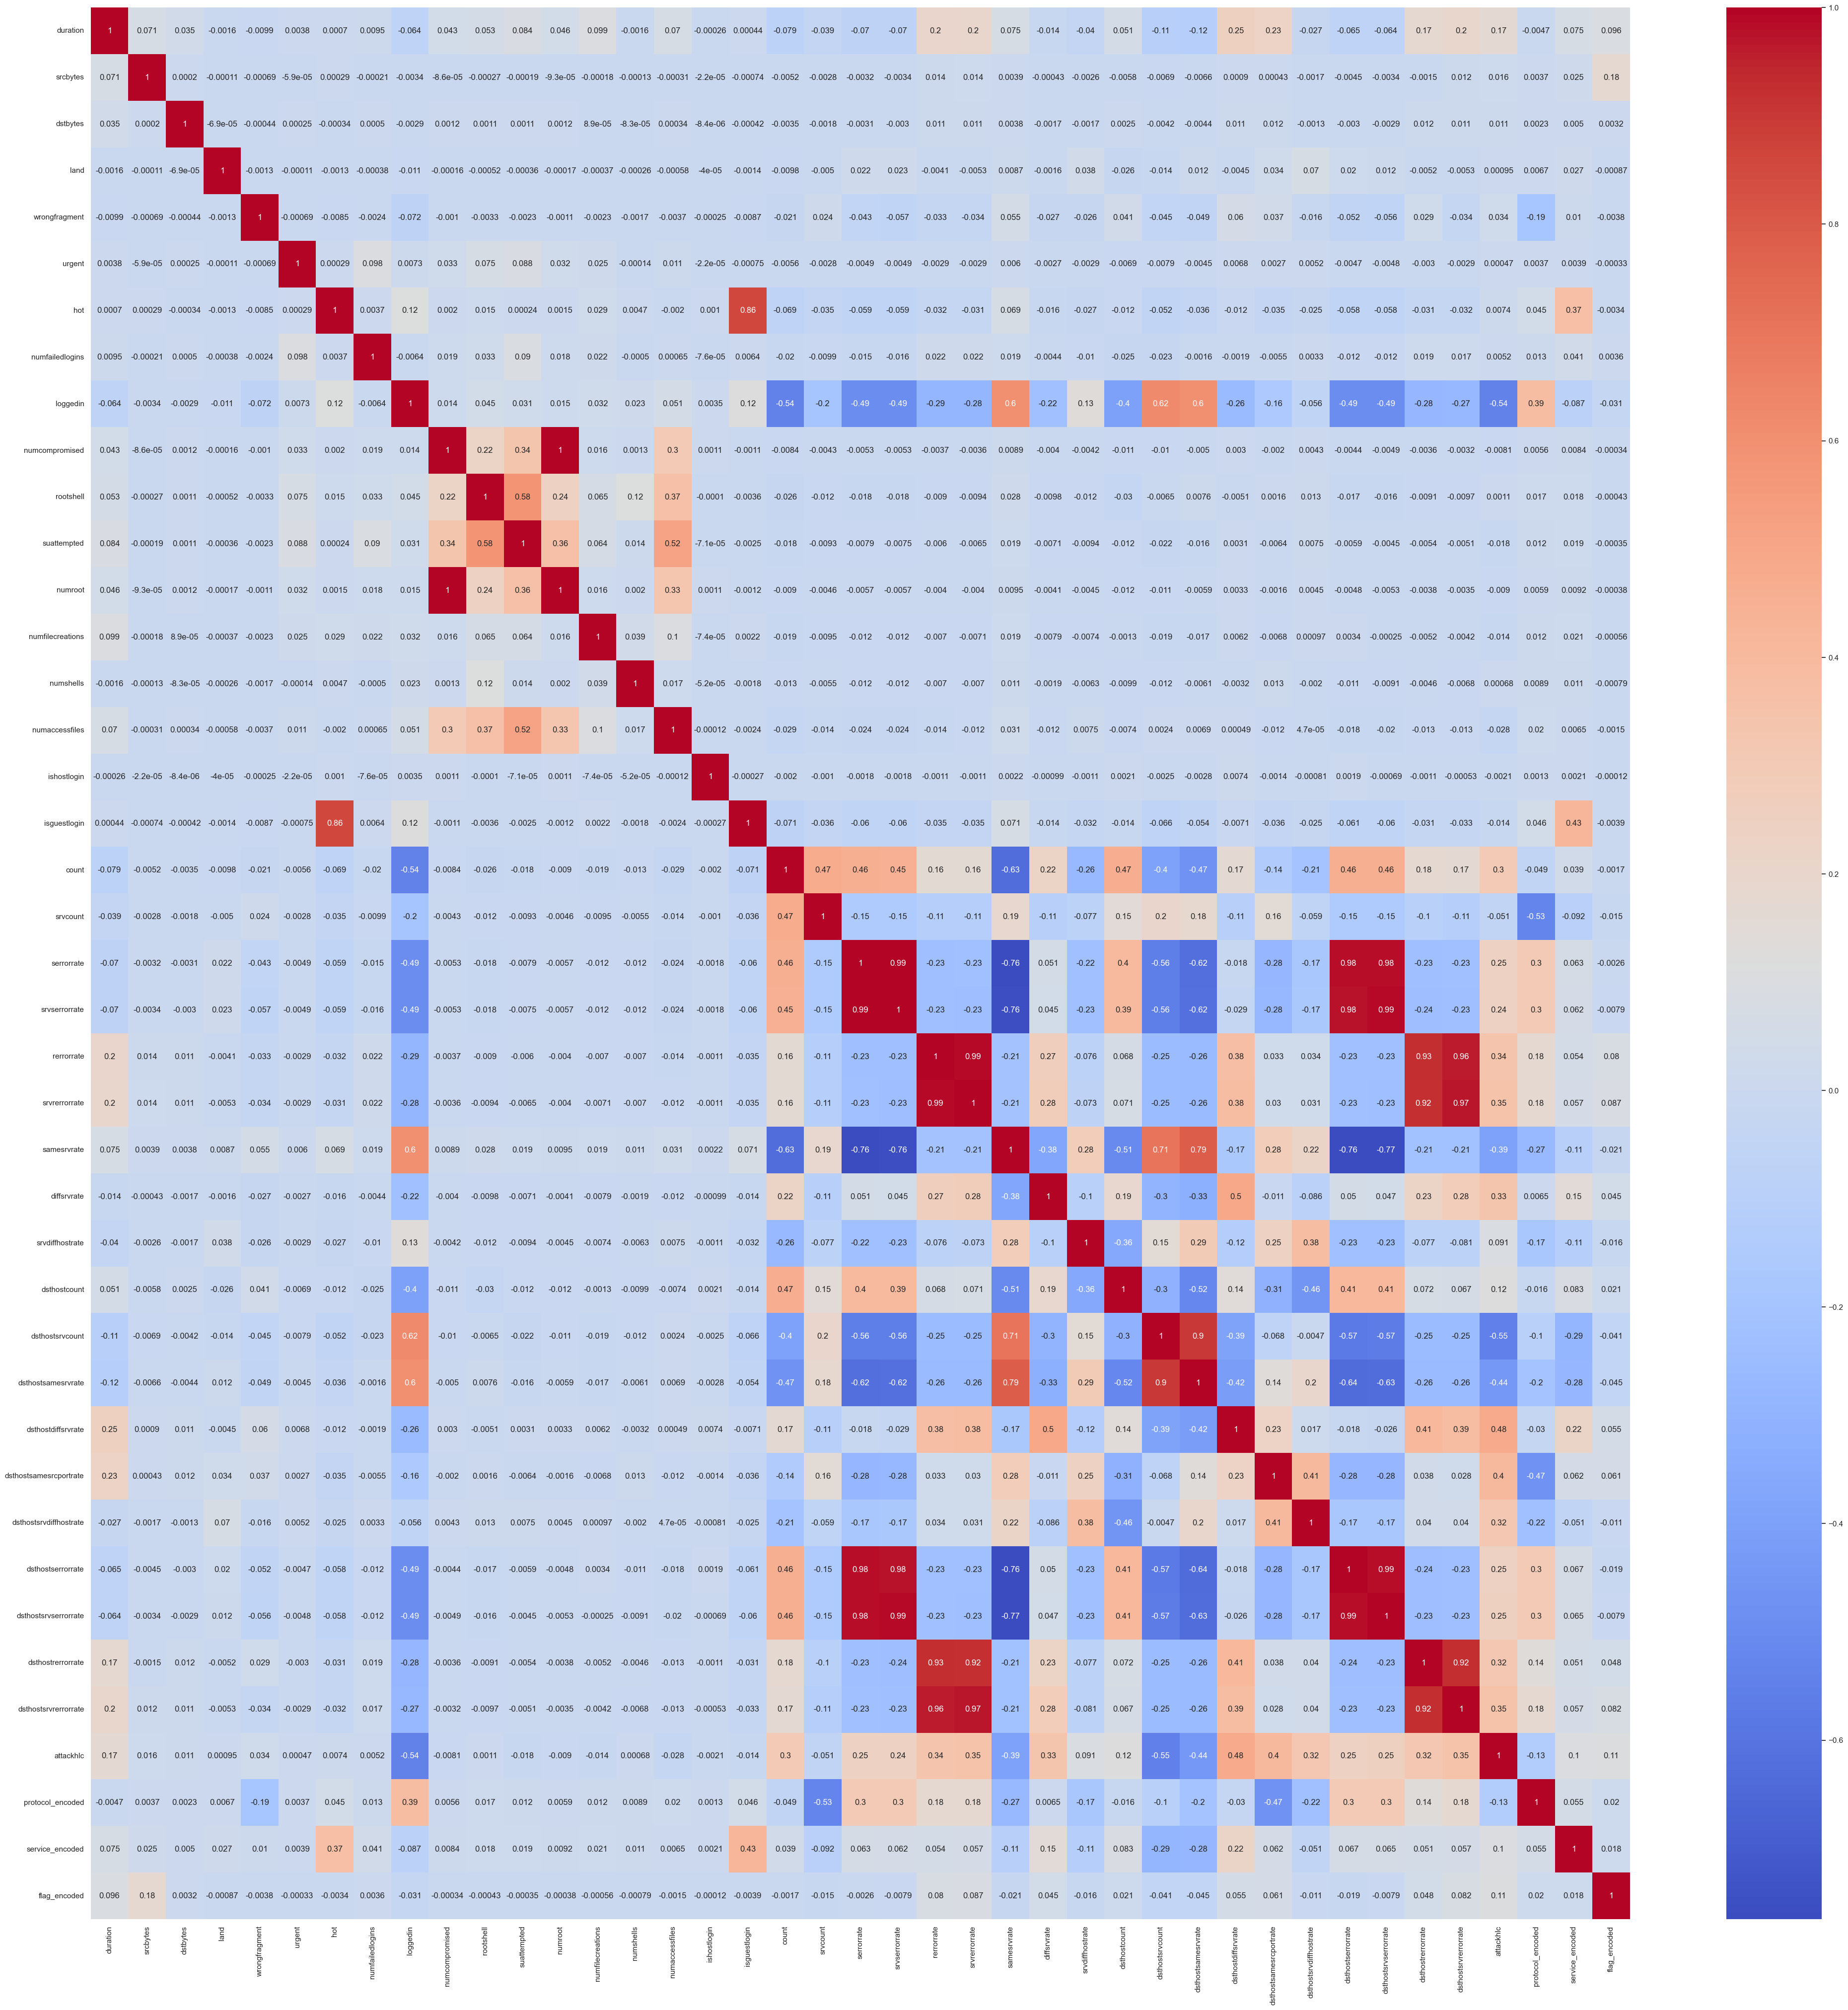

In [30]:
# heatmap to find the correlation between different variables
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.savefig("../artifacts/heatmap_post_encoding.png")
plt.show()

In [31]:
df.shape

(125964, 41)

In [32]:
# dropping all the highly correlated variables
df.drop(columns = [
    "isguestlogin",
    "numroot",
    "srvserrorrate",
    "dsthostserrorrate",
    "dsthostsrvserrorrate",
    "srvrerrorrate",
    "dsthostrerrorrate",
    "dsthostsrvrerrorrate",
    "dsthostsamesrvrate"
], inplace = True)
df.shape

(125964, 32)

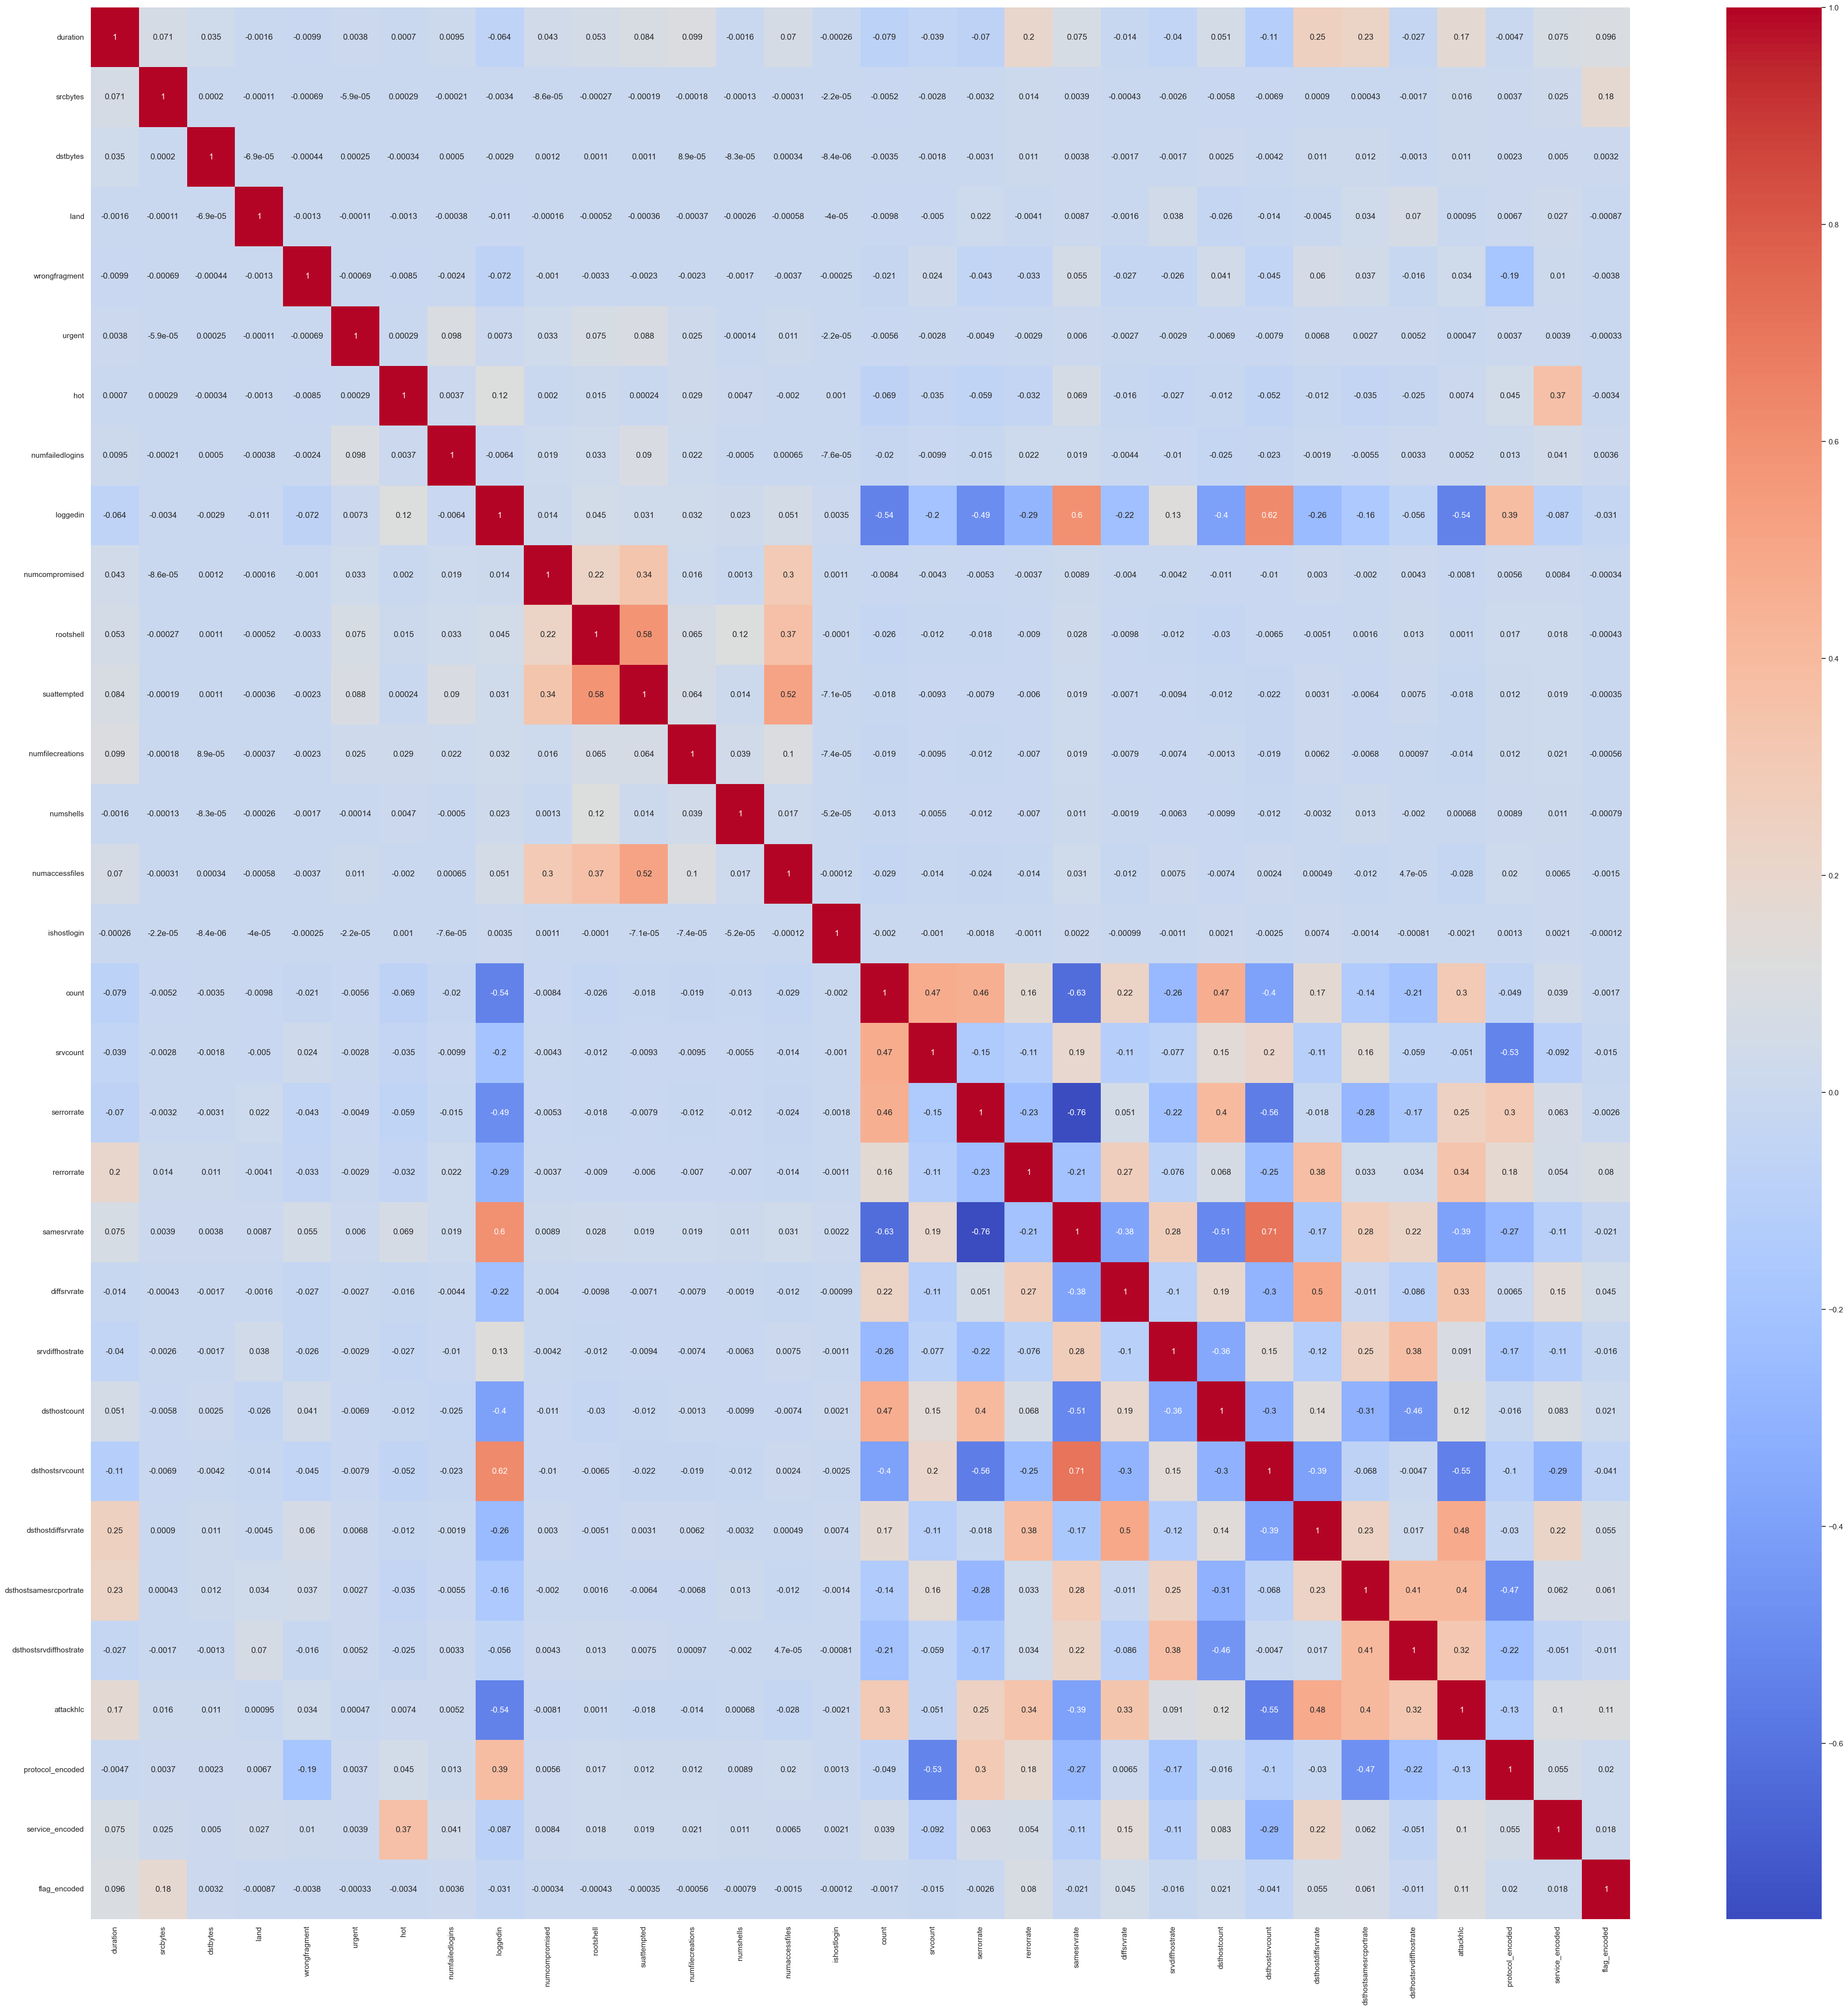

In [33]:
# heatmap to find the correlation between different variables after removing the highly correlated variables
plt.figure(figsize = (50, 50))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.savefig("../artifacts/heatmap_correlated_columns_dropped.png")
plt.show()

In [34]:
# separating the independent variables (features) and the dependent variable (target)
x = df.drop(columns = ["attackhlc"])
y = df["attackhlc"]
x.shape, y.shape

((125964, 31), (125964,))

In [35]:
# splitting x and y into train-test-validation datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 96)

In [36]:
# shape of the training data
x_train.shape, y_train.shape

((88174, 31), (88174,))

In [37]:
# shape of the testing data
x_test.shape, y_test.shape

((37790, 31), (37790,))

In [38]:
# saving the independent variables data, dependent variables data, training data, validation data, and testing data into .csv files
x.to_csv("../datasets/x.csv")
y.to_csv("../datasets/y.csv")
x_train.to_csv("../datasets/x_train.csv")
y_train.to_csv("../datasets/y_train.csv")
x_test.to_csv("../datasets/x_test.csv")
y_test.to_csv("../datasets/y_test.csv")